In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
offset = int(df.shape[0] / 2)
df_train = df.iloc[:offset]
df_test = df.iloc[offset:]


from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
X = df_train.loc[:, ~df.columns.isin(["Class"])]
Y = df_train["Class"]

model = rfc.fit(X, np.ravel(Y))

In [7]:
pred_train = model.predict(X)
x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["Class"])], df_test["Class"]
pred_test = model.predict(x_test)
table_train = pd.crosstab(Y, pred_train, margins=True)
table_test = pd.crosstab(y_test, pred_test, margins=True)



In [8]:
table_train

col_0,0,1,All
Class,,,
0,142134,0,142134
1,11,258,269
All,142145,258,142403


In [9]:
table_test

col_0,0,1,All
Class,,,
0,142142,39,142181
1,58,165,223
All,142200,204,142404


## **STOP HERE **

In [33]:
offset = int(df.shape[0]/2)

X = df[["Time", "Amount"]]
y = df["Class"]

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=15)
neighborsf = neighbors.fit(X_train, y_train)
print("Percent accuracy of KNN classifier on training set:", neighborsf.score(X_train, y_train))

Percent accuracy of KNN classifier on training set: 0.9981109948526365


In [38]:
y_pred = neighborsf.predict(X_test)

print("Percent accuracy of KNN classifier on test set:", ((y_pred == y_test).sum()) / X_test.shape[0])

Percent accuracy of KNN classifier on test set: 0.998434032751889


In [39]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [52]:
492/284000

0.0017323943661971832

In [42]:
X_test["y_pred"] = y_pred

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
X_test.head()

,Time,Amount,y_pred
142403,84692,12,0
142404,84693,19,0
142405,84694,12,0
142406,84695,66,0
142407,84695,141,0


In [44]:
X_test["Fraud"] = y_test

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
X_test[X_test["Fraud"] == 1].head()


,Time,Amount,y_pred,Fraud
142405,84694,12,0,1
142557,84789,354,0,1
143188,85181,2,0,1
143333,85285,0,0,1
143334,85285,0,0,1
143335,85285,252,0,1
143336,85285,252,0,1
143728,85573,1,0,1
143731,85576,240,0,1
144104,85864,1,0,1


In [53]:
df[df["Class"] == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0,1
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529,1
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239,1
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59,1
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,1


In [54]:
df = df[["Time", "Amount", "Class"]]

In [55]:
df.head()

,Time,Amount,Class
0,0,149,0
1,0,2,0
2,1,378,0
3,1,123,0
4,2,69,0


In [56]:
df_fraud = df[df["Class"] == 1]

In [57]:
df_clean = df[df["Class"] == 0]

In [61]:
offset = int(df_fraud.shape[0] / 2)

In [63]:
df_fraud_train = df_fraud[:offset]

In [64]:
df_fraud_test = df_fraud[offset:]

In [65]:
284000 / 500

568.0

In [68]:
df_clean_train = df_clean.iloc[::570, :]
df_clean_train.head()

,Time,Amount,Class
0,0,149,0
571,427,12,0
1142,890,135,0
1712,1323,10,0
2282,1827,19,0


In [69]:
df_clean_test = df_clean.iloc[1::570,:]
df_clean_test.head()

,Time,Amount,Class
1,0,2,0
572,427,539,0
1143,891,4,0
1713,1323,30,0
2283,1827,9,0


In [70]:
df_clean_test.shape

(499, 3)

In [71]:
df_train = pd.concat([df_clean_train, df_fraud_train])

In [72]:
df_train.shape

(745, 3)

In [73]:
df_test = pd.concat([df_clean_test, df_fraud_test])

In [74]:
x_train = df_train.loc[:, ~df_train.columns.isin(["Class"])]
y_train = df_train["Class"]
x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["Class"])], df_test["Class"]

In [75]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=15)
neighborsf = neighbors.fit(x_train, y_train)
print("Percent accuracy of KNN classifier on training set:", neighborsf.score(x_train, y_train))

Percent accuracy of KNN classifier on training set: 0.7919463087248322


In [76]:
y_pred = neighborsf.predict(x_test)

print("Percent accuracy of KNN classifier on test set:", ((y_pred == y_test).sum()) / x_test.shape[0])

Percent accuracy of KNN classifier on test set: 0.5771812080536913


In [94]:
df_test["KNNPrediction"] = y_pred

In [95]:
df_test[(df_test["Class"] == 1) & (df_test["Prediction"] == 0)].head(20)


,Time,Amount,Class,Prediction,KNNPrediction
119781,75581,124,1,0,0
120505,75851,99,1,0,0
120837,75978,99,1,0,0
122479,76575,219,1,0,0
123141,76826,254,1,0,0
123201,76845,1,1,0,0
123238,76857,1,1,0,0
123270,76867,1,1,0,0
123301,76876,1,1,0,0
124036,77154,129,1,0,0


In [96]:
del df_test["Prediction"]

KNN classified fraud with 0% accuracy

In [86]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

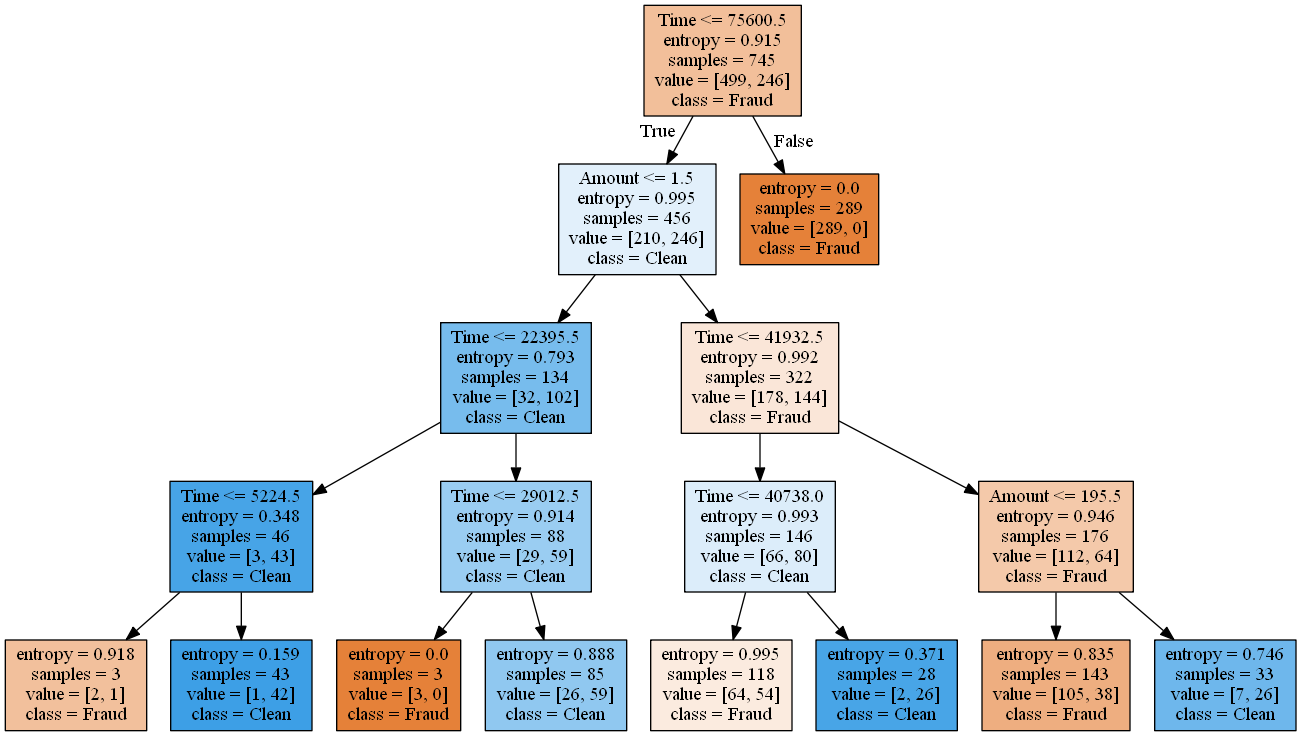

In [89]:
#using decision tree

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
model = decision_tree.fit(x_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x_train.columns,
    class_names=["Fraud", "Clean"],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [91]:
print("Percent accuracy of decision tree on training set: ", model.score(x_train, y_train))

Percent accuracy of decision tree on training set:  0.8268456375838926


In [92]:
y_pred = model.predict(x_test)

In [114]:
print("Percent accuracy of decision tree on test set:", ((y_pred == y_test).sum()) / x_test.shape[0])

Percent accuracy of decision tree on test set: 0.5879194630872483


In [97]:
df_test["TreePrediction"] = y_pred

In [98]:
df_test.head()

,Time,Amount,Class,KNNPrediction,TreePrediction
1,0,2,0,0,0
572,427,539,0,0,0
1143,891,4,0,0,0
1713,1323,30,0,0,0
2283,1827,9,0,0,0


In [101]:
df_test[(df_test["Class"] == 0) & (df_test["TreePrediction"] == 0)].head(20)


,Time,Amount,Class,KNNPrediction,TreePrediction
1,0,2,0,0,0
572,427,539,0,0,0
1143,891,4,0,0,0
1713,1323,30,0,0,0
2283,1827,9,0,0,0
2853,2423,613,0,0,0
3423,2931,1,0,0,0
3993,3636,10,0,0,0
4563,3884,12,0,0,0
5134,4827,15,0,0,0


In [100]:
df_test[(df_test["Class"] == 1) & (df_test["TreePrediction"] == 0)].head(20)


,Time,Amount,Class,KNNPrediction,TreePrediction
119781,75581,124,1,0,0
120505,75851,99,1,0,0
120837,75978,99,1,0,0
122479,76575,219,1,0,0
123141,76826,254,1,0,0
123201,76845,1,1,0,0
123238,76857,1,1,0,0
123270,76867,1,1,0,0
123301,76876,1,1,0,0
124036,77154,129,1,0,0


Similarly, the decision tree did not accurately classify any of the cases of fraud.

In [102]:
# now trying random forest

from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
Y = y_train
X = x_train

model = rfc.fit(X, Y.ravel())

In [103]:
print("Percent accuracy of Random Forest on training set: ", model.score(X, Y))

Percent accuracy of decision tree on training set:  0.978523489932886


In [104]:
y_pred = model.predict(x_test)

print("Percent accuracy of Random Forest on test set:", ((y_pred == y_test).sum()) / x_test.shape[0])

Percent accuracy of KNN classifier on test set: 0.5879194630872483


In [105]:
df_test["RFPrediction"] = y_pred

In [108]:
df_test[(df_test["Class"] == 0) & (df_test["RFPrediction"] == 0)]

,Time,Amount,Class,KNNPrediction,TreePrediction,RFPrediction
1,0,2,0,0,0,0
1143,891,4,0,0,0,0
1713,1323,30,0,0,0,0
2283,1827,9,0,0,0,0
3423,2931,1,0,0,0,0
3993,3636,10,0,0,0,0
4563,3884,12,0,0,0,0
5134,4827,15,0,0,0,0
6275,7384,100,0,0,0,0
7436,10088,4,0,0,0,0


Same story with random forest

In [109]:
#trying SVC

from sklearn.svm import SVC

In [110]:
Y = y_train
X = x_train
svm = SVC()
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
print("Percent accuracy of SVC on training set: ", model.score(X, Y))

Percent accuracy of SVC on training set:  0.978523489932886


In [115]:
y_pred = svm.predict(x_test)

print("Percent accuracy of SVC on test set: ", ((y_pred == y_test).sum()) / x_test.shape[0])

Percent accuracy of SVC on test set:  0.6697986577181209


In [116]:
df_test["SVCPrediction"] = y_pred

In [117]:
df_test[(df_test["Class"] == 1) & (df_test["SVCPrediction"] == 1)]

,Time,Amount,Class,KNNPrediction,TreePrediction,RFPrediction,SVCPrediction


In [118]:
df_test["Class"].value_counts()

0    499
1    246
Name: Class, dtype: int64

Up until now, I've been using only two features - amount and time. I'm now going to run the models with the other available features.

In [119]:
df = pd.read_csv("creditcard.csv")

In [120]:
df_fraud = df[df["Class"] == 1]
df_clean = df[df["Class"] == 0]


In [121]:
df_clean_train = df_clean.iloc[::570, :]
df_clean_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
571,427.0,-0.856567,0.842156,1.716677,-0.016178,1.054486,-0.440338,1.463574,-0.378757,-0.728544,...,0.049032,0.297741,-0.456502,0.197724,0.610523,-0.420531,-0.458258,-0.381306,12.98,0
1142,890.0,-0.491109,-0.738856,0.517531,-0.892458,0.387553,1.077367,-0.002139,0.288926,-1.271496,...,0.236958,0.445255,-0.000001,-1.695887,-0.004652,0.034984,0.106645,0.125129,135.98,0
1712,1323.0,1.082261,-0.057307,1.023976,1.755617,-0.693162,0.287678,-0.597054,0.376952,-0.100521,...,-0.001303,-0.041774,0.088721,0.227421,0.041106,0.949154,-0.056862,-0.001389,10.09,0
2282,1827.0,1.157172,0.001714,0.586513,0.841548,-0.356916,-0.096327,-0.110257,-0.034711,0.432783,...,-0.039235,0.198242,-0.084661,0.181369,0.548537,0.462123,0.005807,0.012418,19.99,0


In [122]:
df_clean_test = df_clean.iloc[1::570,:]
df_clean_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
572,427.0,0.173200,-1.823346,0.307208,1.342691,-1.358111,-0.136944,0.355663,-0.159311,0.854919,...,0.182255,-0.327555,-0.536359,0.507573,0.331853,0.469280,-0.102721,0.106901,539.17,0
1143,891.0,-0.563566,0.727536,2.559772,1.759765,-0.445026,0.554545,0.068873,0.213013,0.371588,...,-0.234582,-0.161813,0.037428,0.646023,-0.427127,-0.487851,0.108020,0.174056,4.04,0
1713,1323.0,1.232713,-0.361225,-0.148648,-1.342176,-0.684012,-1.316641,0.112169,-0.206511,1.093759,...,0.031783,0.221532,-0.170605,0.609623,0.738574,0.046224,-0.024046,-0.002776,30.00,0
2283,1827.0,-0.920908,1.266966,1.212197,0.678751,0.203283,-0.097771,0.685674,0.036850,0.167463,...,-0.084645,0.081838,-0.160695,0.084306,0.329285,-0.354602,0.155744,0.141458,9.99,0


In [123]:
df_fraud_train = df_fraud[:offset]
df_fraud_test = df_fraud[offset:]

In [124]:
df_test = pd.concat([df_clean_test, df_fraud_test])
df_train = pd.concat([df_clean_train, df_fraud_train])

In [125]:
x_train, y_train = df_train.loc[:, ~df_train.columns.isin(["Class"])], df_train["Class"]
x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["Class"])], df_test["Class"]

In [126]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=15)
neighborsf = neighbors.fit(x_train, y_train)
print("Percent accuracy of KNN classifier on training set:", neighborsf.score(x_train, y_train))

Percent accuracy of KNN classifier on training set: 0.7919463087248322


In [127]:
y_pred = neighborsf.predict(x_test)

print("Percent accuracy of KNN classifier on test set: ", ((y_pred == y_test).sum()) / x_test.shape[0])

Percent accuracy of KNN classifier on test set:  0.5771812080536913
